<a href="https://colab.research.google.com/github/deepakp23/Tensorflow/blob/main/human_or_horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import zipfile

In [2]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip" \
    -O "/tmp/horse-or-human.zip"

zip_ref = zipfile.ZipFile("/tmp/horse-or-human.zip", 'r')
zip_ref.extractall("/tmp/h-or-h")
zip_ref.close()

--2020-12-07 14:33:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   119MB/s    in 1.2s    

2020-12-07 14:33:16 (119 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
train_horse_dir = os.path.join('/tmp/h-or-h/horses')
train_human_dir = os.path.join('/tmp/h-or-h/humans')

In [4]:
train_horse_name = os.listdir(train_horse_dir)
train_human_name = os.listdir(train_human_dir)

In [ ]:
train_horse_name

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

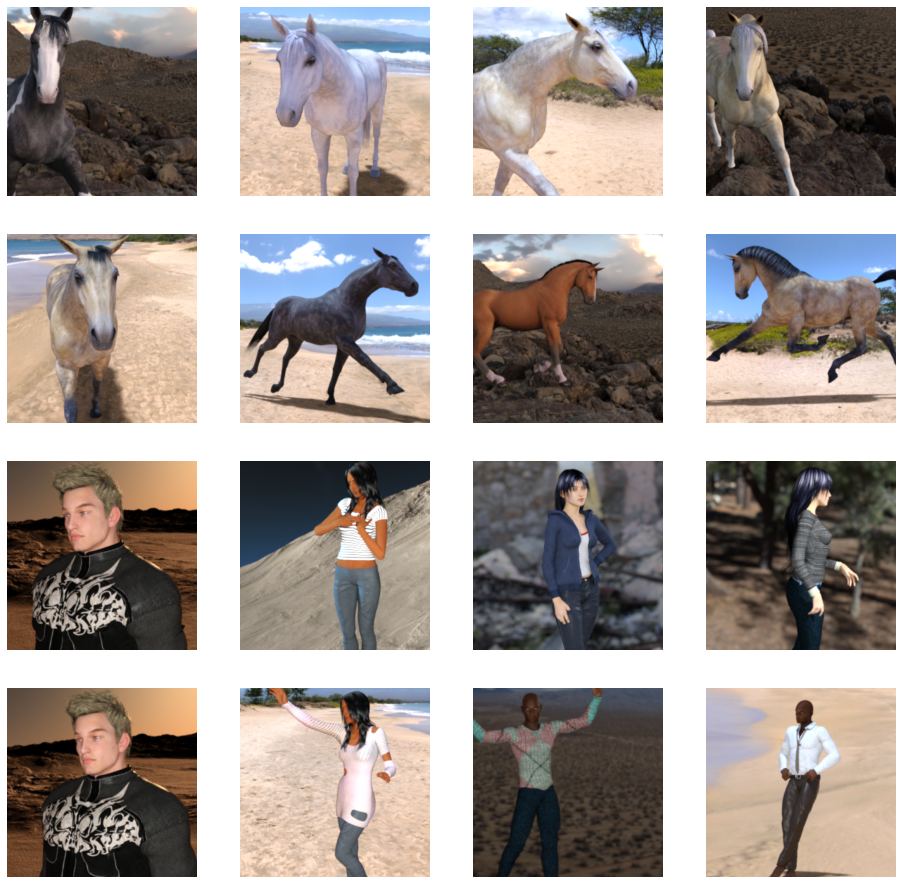

In [6]:
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index += 8
next_horse = [os.path.join(train_horse_dir, fname) for fname in train_horse_name[pic_index - 8: pic_index]]
next_human = [os.path.join(train_human_dir, fname) for fname in train_human_name[pic_index - 8: pic_index]]

for i, img_path in enumerate(next_horse + next_human):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                                 keras.layers.MaxPool2D((2,2)),
                                 
                                 keras.layers.Conv2D(32 , (3,3), activation='relu'),
                                 keras.layers.MaxPool2D((2,2)),

                                 keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation = 'relu'),
                                 keras.layers.Dense(1,activation='sigmoid')

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
model.compile(optimizer = keras.optimizers.RMSprop(lr = 0.001),
              loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-h',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
8/8 [==============================] - 63s 8s/step - loss: 1.2011 - accuracy: 0.5773
Epoch 2/15
8/8 [==============================] - 63s 8s/step - loss: 0.9800 - accuracy: 0.6952
Epoch 3/15
8/8 [==============================] - 62s 8s/step - loss: 0.8033 - accuracy: 0.7408
Epoch 4/15
8/8 [==============================] - 63s 8s/step - loss: 0.3232 - accuracy: 0.8988
Epoch 5/15
8/8 [==============================] - 66s 8s/step - loss: 0.2112 - accuracy: 0.9232
Epoch 6/15
8/8 [==============================] - 74s 9s/step - loss: 0.1362 - accuracy: 0.9511
Epoch 7/15
8/8 [==============================] - 63s 8s/step - loss: 1.0807 - accuracy: 0.8565
Epoch 8/15
8/8 [==============================] - 72s 9s/step - loss: 0.1206 - accuracy: 0.9580
Epoch 9/15
8/8 [==============================] - 63s 8s/step - loss: 0.0729 - accuracy: 0.9766
Epoch 10/15
8/8 [==============================] - 63s 8s/st

In [12]:
import numpy as np 
from  google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size = (300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')

Saving a6923adbc7bece73803221613f410782.webp to a6923adbc7bece73803221613f410782.webp
[1.]
a6923adbc7bece73803221613f410782.webp is a human
